In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import linear_model

import scipy.stats as stats
from scipy.stats import pearsonr

from mpl_toolkits.mplot3d import Axes3D

import graphviz
from graphviz import Graph


In [3]:
df = sns.load_dataset('tips')
df.shape

(244, 7)

In [6]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [11]:
df['tip_perc'] = df['tip'] / df['total_bill']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


In [25]:
df.describe()

,total_bill,tip,size,tip_perc
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [12]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
tip_perc       float64
dtype: object

In [16]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
tip_perc      0
dtype: int64

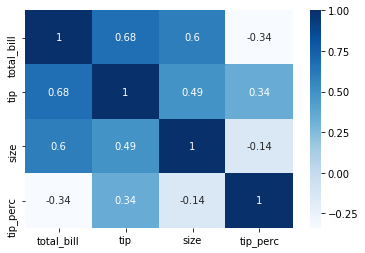

In [17]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [14]:
stats.ttest_ind(df[df.time == 'Dinner'].tip_perc, df[df.time == 'Lunch'].tip_perc)

Ttest_indResult(statistic=-0.5278867814179384, pvalue=0.5980616074405452)

### Checking the tip percentages of lunch vs. dinner does not show a significant difference.

In [15]:
stats.ttest_ind(df[df.smoker == 'Yes'].tip_perc, df[df.smoker == 'No'].tip_perc)

Ttest_indResult(statistic=0.4796693002669869, pvalue=0.6318957776878522)

### Whether or not the customer is a smoker does not really seem to matter on the tip percentage.

In [18]:
stats.ttest_ind(df[df.sex == 'Female'].tip_perc, df[df.sex == 'Male'].tip_perc)

Ttest_indResult(statistic=1.0833972270477996, pvalue=0.2797103849605489)

### Gender is not playing a big role either.

In [26]:
df['tip_perc_bin'] = pd.qcut(df.tip_perc, 4, labels=False)
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_perc,tip_perc_bin
152,17.26,2.74,Male,No,Sun,Dinner,3,0.158749,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2,0.157771,2
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240,2
16,10.33,1.67,Female,No,Sun,Dinner,3,0.161665,2
82,10.07,1.83,Female,No,Thur,Lunch,1,0.181728,2


In [27]:
tbl = pd.crosstab(df['time'], df['tip_perc_bin'])
tbl

stat, p, dof, expected = stats.chi2_contingency(tbl)
p

0.10993129881682355

### Time of day is not a good indicator of what tip percentage quartile a customer will fall into.